In [1]:
pip install numpy pandas matplotlib seaborn scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip list

Package               Version
--------------------- ----------------
appdirs               1.4.4
apturl                0.5.2
argon2-cffi           21.1.0
attrs                 21.2.0
Babel                 2.8.0
backcall              0.2.0
bcrypt                3.2.0
beautifulsoup4        4.10.0
beniget               0.4.1
bleach                4.1.0
blinker               1.4
Brlapi                0.8.3
Brotli                1.0.9
catkin-pkg            1.0.0
catkin-pkg-modules    1.0.0
certifi               2020.6.20
chardet               4.0.0
click                 8.0.3
colorama              0.4.4
command-not-found     0.3
contourpy             1.2.1
cryptography          3.4.8
cupshelpers           1.0
cycler                0.12.1
dbus-python           1.2.18
decorator             4.4.2
defer                 1.0.6
defusedxml            0.7.1
distlib               0.3.4
distro                1.7.0
distro-info           1.1+ubuntu0.2
docopt                0.6.2
docutils              0.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# Load the datasets
benin_df = pd.read_csv('data/benin-malanville.csv')
sierraleone_df = pd.read_csv('data/sierraleone-bumbuna.csv')
togo_df = pd.read_csv('data/togo-dapaong_qc.csv')

# Display the first few rows of each DataFrame
print("Benin Data:")
print(benin_df.head())

print("\nSierra Leone Data:")
print(sierraleone_df.head())

print("\nTogo Data:")
print(togo_df.head())


Benin Data:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

Sierra 

In [4]:
# Summary Statistics
print("Benin Data Summary Statistics:")
print(benin_df.describe())

print("\nSierra Leone Data Summary Statistics:")
print(sierraleone_df.describe())

print("\nTogo Data Summary Statistics:")
print(togo_df.describe())


Benin Data Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25

In [6]:
# Convert columns to numeric, forcing errors to NaN
numeric_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'TModA', 'TModB']

for col in numeric_columns:
    benin_df[col] = pd.to_numeric(benin_df[col], errors='coerce')

# Check for missing values again after conversion
print("Benin Data Quality Check (Missing Values):")
print(benin_df.isnull().sum())

# Check for negative values in numeric columns
print("\nBenin Data Quality Check (Negative Values):")
for col in numeric_columns:
    if col in benin_df.columns:
        negative_count = (benin_df[col] < 0).sum()
        print(f"{col}: {negative_count} negative values")


Benin Data Quality Check (Missing Values):
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Benin Data Quality Check (Negative Values):
GHI: 258847 negative values
DNI: 275987 negative values
DHI: 259182 negative values
ModA: 0 negative values
ModB: 0 negative values
Tamb: 0 negative values
RH: 0 negative values
WS: 0 negative values
WSgust: 0 negative values
WSstdev: 0 negative values
WD: 0 negative values
WDstdev: 0 negative values
BP: 0 negative values
TModA: 0 negative values
TModB: 0 negative values


In [7]:
# Replace negative values in specific columns with NaN
solar_radiation_columns = ['GHI', 'DNI', 'DHI']
for col in solar_radiation_columns:
    benin_df[col] = benin_df[col].apply(lambda x: x if x >= 0 else pd.NA)


In [8]:
# Drop the Comments column if it's entirely null
benin_df.drop(columns=['Comments'], inplace=True)


In [11]:
# Convert relevant columns to numeric, if possible
numeric_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'TModA', 'TModB']
benin_df[numeric_columns] = benin_df[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [12]:
# Interpolate only numeric columns
benin_df[numeric_columns] = benin_df[numeric_columns].interpolate(method='linear')


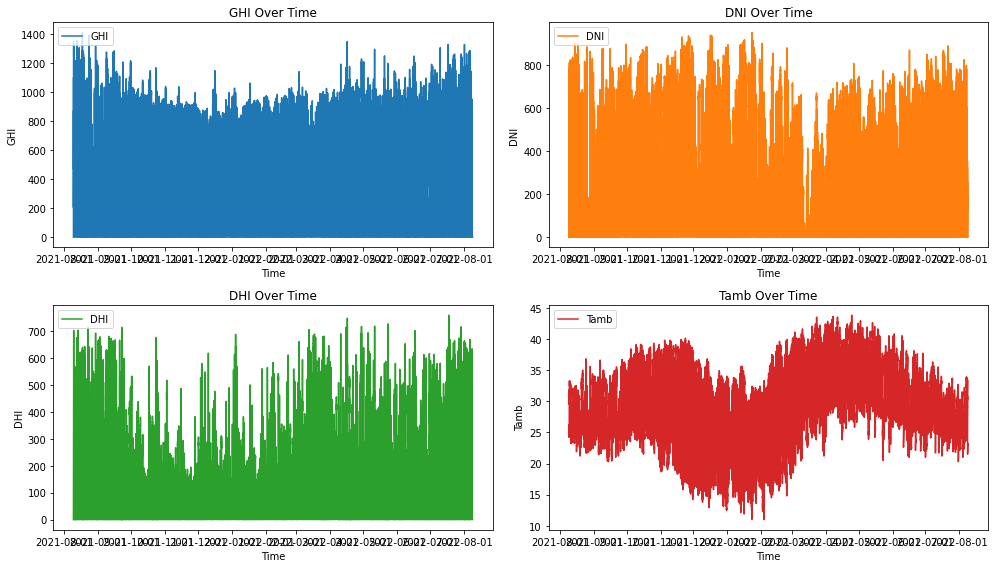

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'Timestamp' to datetime if it's not already
benin_df['Timestamp'] = pd.to_datetime(benin_df['Timestamp'])

# Convert relevant columns to numeric
numeric_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'TModA', 'TModB']
benin_df[numeric_columns] = benin_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Interpolate missing data
benin_df[numeric_columns] = benin_df[numeric_columns].interpolate(method='linear')

plt.figure(figsize=(14, 8))

# Plot GHI over time
plt.subplot(2, 2, 1)
plt.plot(benin_df['Timestamp'], benin_df['GHI'], label='GHI', color='tab:blue')
plt.title('GHI Over Time')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.legend(loc='upper left')

# Plot DNI over time
plt.subplot(2, 2, 2)
plt.plot(benin_df['Timestamp'], benin_df['DNI'], label='DNI', color='tab:orange')
plt.title('DNI Over Time')
plt.xlabel('Time')
plt.ylabel('DNI')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.legend(loc='upper left')

# Plot DHI over time
plt.subplot(2, 2, 3)
plt.plot(benin_df['Timestamp'], benin_df['DHI'], label='DHI', color='tab:green')
plt.title('DHI Over Time')
plt.xlabel('Time')
plt.ylabel('DHI')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.legend(loc='upper left')

# Plot Tamb over time
plt.subplot(2, 2, 4)
plt.plot(benin_df['Timestamp'], benin_df['Tamb'], label='Tamb', color='tab:red')
plt.title('Tamb Over Time')
plt.xlabel('Time')
plt.ylabel('Tamb')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [14]:
# Group by Cleaning status and calculate mean of sensor readings
cleaning_impact = benin_df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print(cleaning_impact)


                ModA        ModB
Cleaning                        
0         236.524253  228.816071
1         307.229278  301.972165


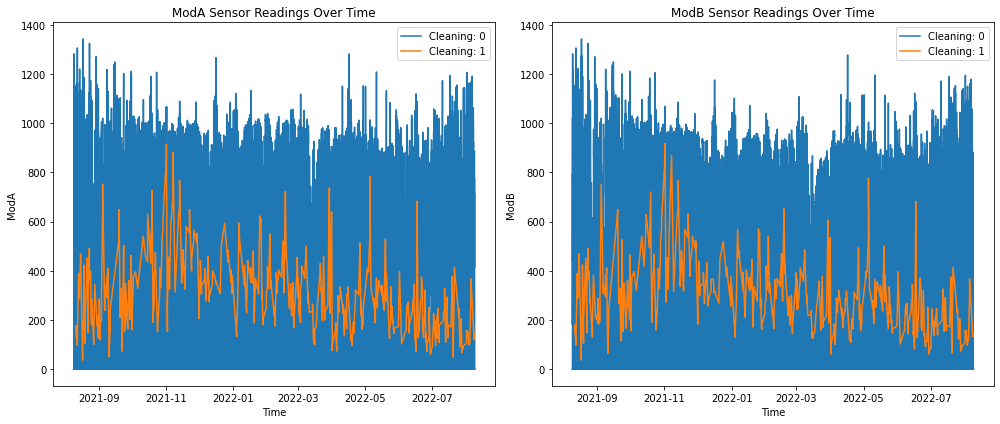

In [15]:
plt.figure(figsize=(14, 6))

# Plot ModA readings
plt.subplot(1, 2, 1)
for cleaning_status in benin_df['Cleaning'].unique():
    subset = benin_df[benin_df['Cleaning'] == cleaning_status]
    plt.plot(subset['Timestamp'], subset['ModA'], label=f'Cleaning: {cleaning_status}')
plt.title('ModA Sensor Readings Over Time')
plt.xlabel('Time')
plt.ylabel('ModA')
plt.legend()

# Plot ModB readings
plt.subplot(1, 2, 2)
for cleaning_status in benin_df['Cleaning'].unique():
    subset = benin_df[benin_df['Cleaning'] == cleaning_status]
    plt.plot(subset['Timestamp'], subset['ModB'], label=f'Cleaning: {cleaning_status}')
plt.title('ModB Sensor Readings Over Time')
plt.xlabel('Time')
plt.ylabel('ModB')
plt.legend()

plt.tight_layout()
plt.show()


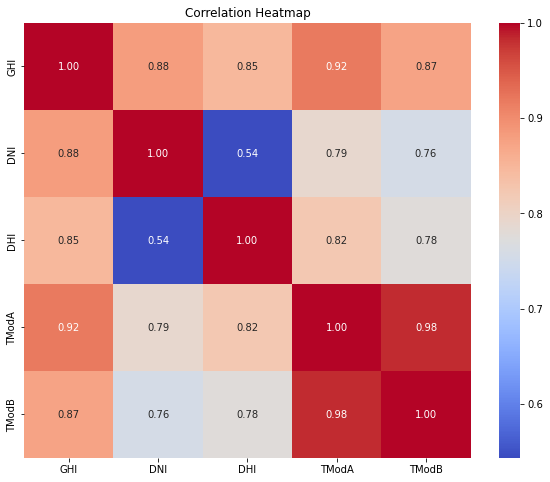

In [16]:

# Compute correlations
correlation_matrix = benin_df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


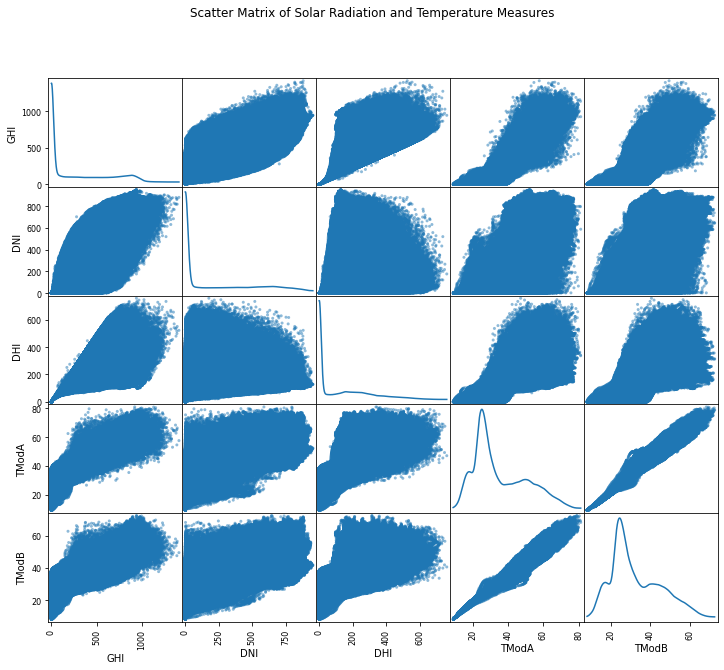

In [17]:
from pandas.plotting import scatter_matrix

# Scatter matrix
scatter_matrix(benin_df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']], figsize=(12, 10), diagonal='kde')
plt.suptitle('Scatter Matrix of Solar Radiation and Temperature Measures')
plt.show()


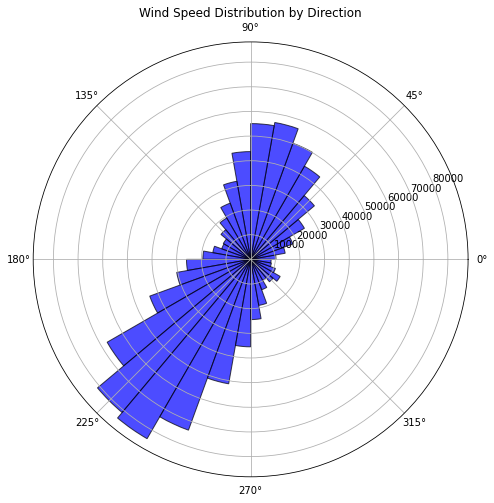

In [18]:
import numpy as np

# Convert wind direction from degrees to radians
wind_direction_rad = np.deg2rad(benin_df['WD'].dropna())

plt.figure(figsize=(8, 8))

# Polar plot
ax = plt.subplot(111, projection='polar')
ax.hist(wind_direction_rad, bins=36, weights=benin_df['WS'].dropna(), color='blue', alpha=0.7, edgecolor='black')
ax.set_title('Wind Speed Distribution by Direction')

plt.show()


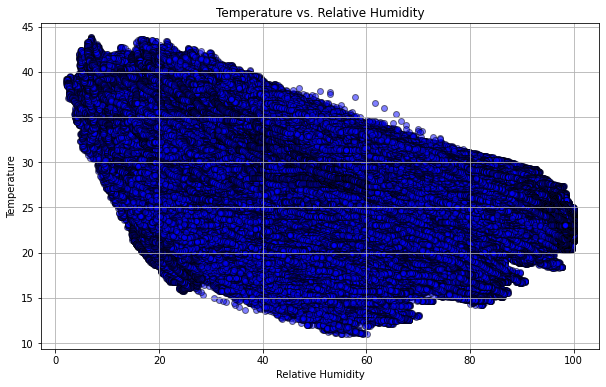

In [19]:
plt.figure(figsize=(10, 6))

plt.scatter(benin_df['RH'], benin_df['Tamb'], alpha=0.5, c='blue', edgecolors='k')
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Relative Humidity')
plt.ylabel('Temperature')
plt.grid(True)

plt.show()


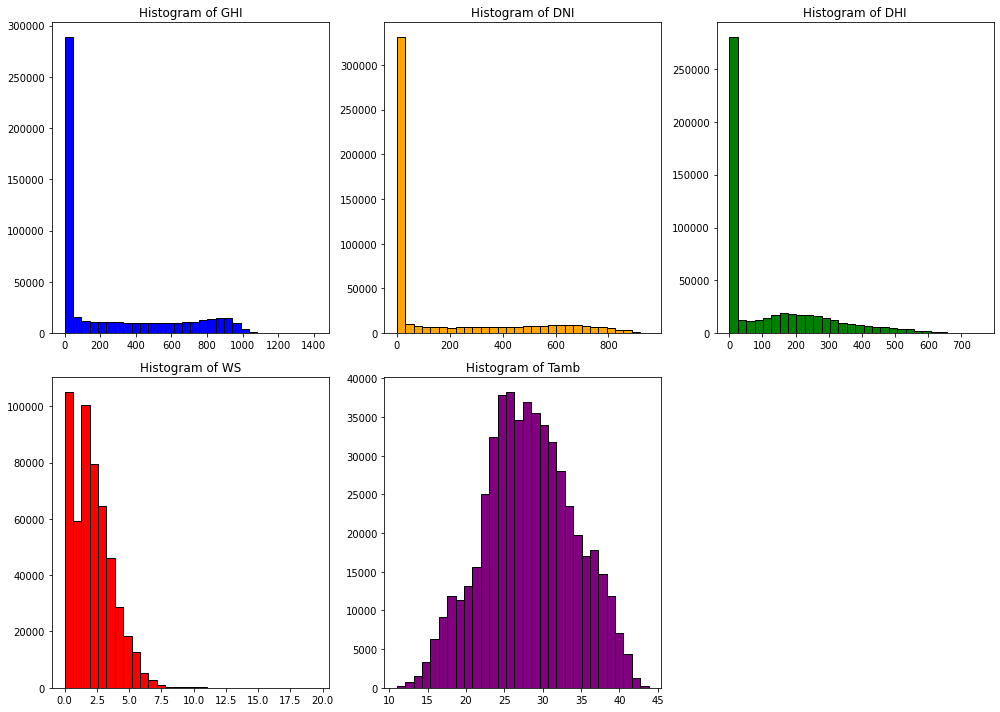

In [20]:
plt.figure(figsize=(14, 10))

# Histogram for GHI
plt.subplot(2, 3, 1)
plt.hist(benin_df['GHI'].dropna(), bins=30, color='blue', edgecolor='black')
plt.title('Histogram of GHI')

# Histogram for DNI
plt.subplot(2, 3, 2)
plt.hist(benin_df['DNI'].dropna(), bins=30, color='orange', edgecolor='black')
plt.title('Histogram of DNI')

# Histogram for DHI
plt.subplot(2, 3, 3)
plt.hist(benin_df['DHI'].dropna(), bins=30, color='green', edgecolor='black')
plt.title('Histogram of DHI')

# Histogram for WS
plt.subplot(2, 3, 4)
plt.hist(benin_df['WS'].dropna(), bins=30, color='red', edgecolor='black')
plt.title('Histogram of WS')

# Histogram for Tamb
plt.subplot(2, 3, 5)
plt.hist(benin_df['Tamb'].dropna(), bins=30, color='purple', edgecolor='black')
plt.title('Histogram of Tamb')

plt.tight_layout()
plt.show()


In [21]:
from scipy import stats

# Compute Z-scores
z_scores = stats.zscore(benin_df[numeric_columns].dropna())
z_scores_df = pd.DataFrame(z_scores, columns=numeric_columns)

# Flag outliers
outliers = (z_scores_df.abs() > 3).sum()
print("Outliers by Column:\n", outliers)


Outliers by Column:
 GHI          90
DNI           0
DHI        3879
ModA         27
ModB         63
Tamb          0
RH            0
WS         3109
WSgust     3500
WSstdev    5653
WD            0
WDstdev    4765
BP          865
TModA        10
TModB        98
dtype: int64


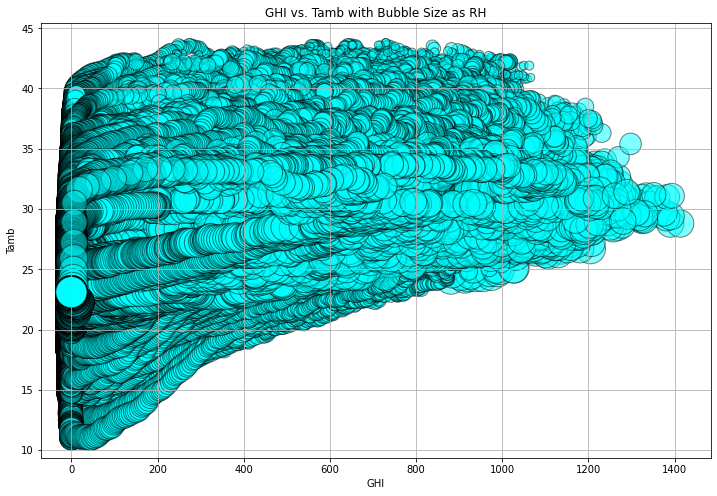

In [22]:
plt.figure(figsize=(12, 8))

# Bubble chart of GHI vs. Tamb with bubble size as RH
plt.scatter(benin_df['GHI'], benin_df['Tamb'], s=benin_df['RH']*10, alpha=0.5, c='cyan', edgecolors='k')
plt.title('GHI vs. Tamb with Bubble Size as RH')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.grid(True)

plt.show()


In [24]:
print(benin_df.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')


In [26]:
# Replace negative values with NaN in columns that should not have negative values
for col in ['GHI', 'DNI', 'DHI']:
    benin_df.loc[benin_df[col] < 0, col] = np.nan

# Optional: Drop rows with NaN values if the column is critical
benin_df = benin_df.dropna(subset=['GHI', 'DNI', 'DHI'])


In [27]:
# List of numeric columns for interpolation
numeric_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Precipitation', 'TModA', 'TModB']

# Perform interpolation
benin_df[numeric_columns] = benin_df[numeric_columns].interpolate(method='linear')


/tmp/ipykernel_22284/3482937817.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benin_df[numeric_columns] = benin_df[numeric_columns].interpolate(method='linear')


/tmp/ipykernel_22284/321943713.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benin_df['Timestamp'] = pd.to_datetime(benin_df['Timestamp'])


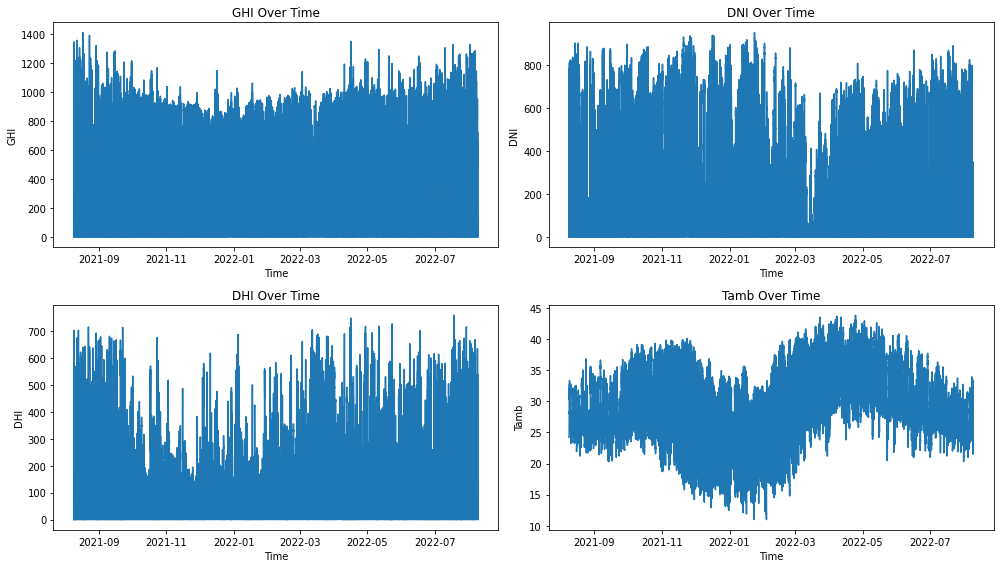

In [28]:
import matplotlib.pyplot as plt

# Convert 'Timestamp' to datetime if it's not already
benin_df['Timestamp'] = pd.to_datetime(benin_df['Timestamp'])

# Plot GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(benin_df['Timestamp'], benin_df['GHI'], label='GHI')
plt.title('GHI Over Time')
plt.xlabel('Time')
plt.ylabel('GHI')

plt.subplot(2, 2, 2)
plt.plot(benin_df['Timestamp'], benin_df['DNI'], label='DNI')
plt.title('DNI Over Time')
plt.xlabel('Time')
plt.ylabel('DNI')

plt.subplot(2, 2, 3)
plt.plot(benin_df['Timestamp'], benin_df['DHI'], label='DHI')
plt.title('DHI Over Time')
plt.xlabel('Time')
plt.ylabel('DHI')

plt.subplot(2, 2, 4)
plt.plot(benin_df['Timestamp'], benin_df['Tamb'], label='Tamb')
plt.title('Tamb Over Time')
plt.xlabel('Time')
plt.ylabel('Tamb')

plt.tight_layout()
plt.show()
